In [1]:
import nltk
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from textblob import TextBlob as tb 
from datetime import datetime

In [2]:
data = pd.read_csv("facebook_data.csv", sep = ";")

In [3]:
data = data.dropna(axis = 0)


In [4]:
data.created_time
f = lambda x: datetime.strptime(x.split("T")[0], "%Y-%m-%d")
data["created_datetime"] = data.created_time.map(f)


In [5]:
posts = pd.DataFrame(data[["created_datetime","message"]][data.level == 1].values, columns =["date","Text"])
comments = pd.DataFrame(data[["created_datetime","message"]][data.level == 2].values, columns = ["date","Text"])

In [6]:
 posts.Text.values.tolist()[:5]

['We are bringing to you another session of #AskEmiratesNBD . This session will be with the Experts from our Mobile Banking team. We will be going live tomorrow, Monday July 9th at 1 pm on our Facebook, Instagram, and Twitter channels. Be sure to tune in and ask us all your questions.  سنقدّم إليكم فقرة جديدة من #AskEmiratesNBD حيث ستكون هذه الفقرة مع فريق خدماتنا المصرفية عبر الهاتف. سنكون على الهواء مباشرة يوم الإثنين9 يوليو في تمام الساعة 1 ظهراً على الفيسبوك والإنستغرام والتويتر. تأكدوا من إرسال أسئلتكم إلينا',
 'Do you know how far your food travels from farm to plate? Reduce your food miles and shop local #GoGreen - هل تعرف إلى أي مدى ينتقل طعامك من المزرعة إلى الطبق؟ قلل الأميال الغذائية الخاصة بك وتسوق محليا  #GoGreen',
 'Grab your coffee on the move. Make contactless payments with your card or phone. Use Emirates NBD Pay, Apple Pay or Samsung Pay for a quick and secure checkout. - احصل على طلب القهوة الخاص بك على الفور. استخدم الدفعات بتقنية عدم التلامس مع بطاقاتنا أو جهازك ال

In [7]:
comments.Text.values[:10]

array(['Buenas ,y como los contactos gracias',
       'Personal Loan Bundle / Credit Card 2-3 Days Approval  We Accept:  ✅Listed or Non-Listed Companies ✅Salary through Bank and Wps (Exchange House) ✅Easy Documentations ✅Salary of 5,000 or 4,000 plus accomodation, transportation, uniform, health insurance card and other allowances ✅Passport, Visa and Emirates id (Copy) ✅Salary Certificate ✅6months payslips ✅6months bank statement  For more info: Call/Whatsapp Kristeta - 0556645056',
       'For the last 2 weeks i have been trying to contact someOne regarding home loan and they say we will call u in 48 hours and no one call this is totally unacceptable when we are late for hour loans u will come and vist us at home don’t promise u want to call if ur are not .. worse bank ever hopefully soon will close my account',
       'Personal Loan Bundle / Credit Card 2-3 Days Approval  We Accept:  ✅Listed or Non-Listed Companies ✅Salary through Bank and Wps (Exchange House) ✅Easy Documentations ✅S

In [8]:
alphabet = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
alphabet.append(" ")

def isenglish(word):
    r = [letter for letter in list(word) if letter in alphabet]
    #return r
    if len(r)< len(word): return False
    else: return True

isenglish("HELLO world")

True

In [9]:
def join(words):
    sent = ""
    for word in words:
        sent = sent + " " + word
    return sent

def clean(text):
    words = [word for word in nltk.word_tokenize(text) if word.isalpha()]
    english_words = [x for x in words if isenglish(x)]
    return join(english_words)

In [10]:
posts["Clean Text"] = posts["Text"].map(clean)
comments["Clean Text"] = comments["Text"].map(clean)

In [11]:
polarity = lambda x : tb(x).sentiment.polarity
subjectivity = lambda x : tb(x).sentiment.subjectivity

In [12]:
posts["polarity"] = posts["Clean Text"].map(polarity)
posts["subjectivity"] = posts["Clean Text"].map(polarity)
comments["polarity"] = comments["Clean Text"].map(polarity)
comments["subjectivity"] = comments["Clean Text"].map(subjectivity)
comments["sentiment_index"] = list(zip(comments.subjectivity.values, comments.polarity.values))

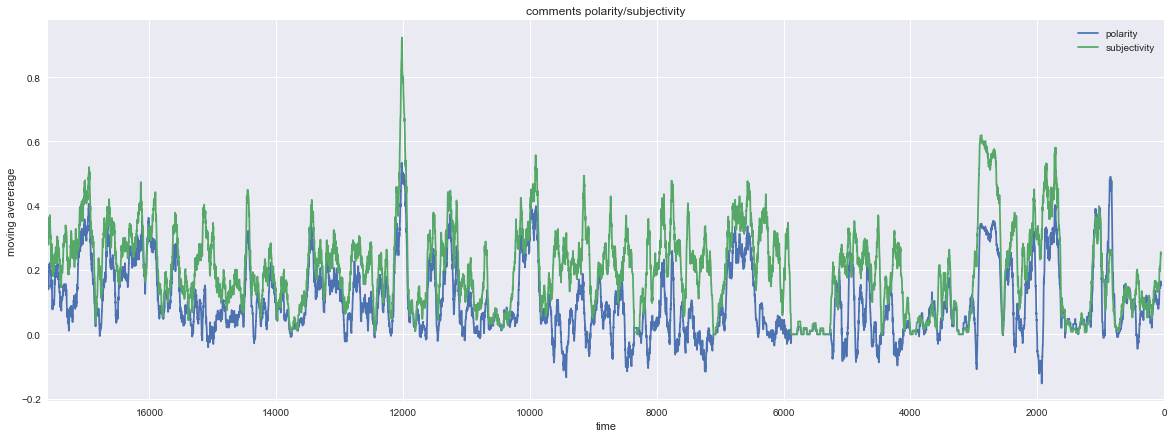

In [13]:
x = comments[["polarity", "subjectivity"]]
X = pd.DataFrame.rolling(x,window = 50).mean()[::-1]
X.plot(figsize = (20,7))
plt.title("comments polarity/subjectivity")
plt.xlabel("time")
plt.ylabel("moving avererage")
plt.show()

In [14]:
def sentiment(index):
    subjectivity, polarity = index[0], index[1]
    if subjectivity > 0.2:
        if polarity > 0: return "Positive"
        else: return "Negetive"
    else: return "Neutral"

comments["sentiment"] = comments["sentiment_index"].map(sentiment)

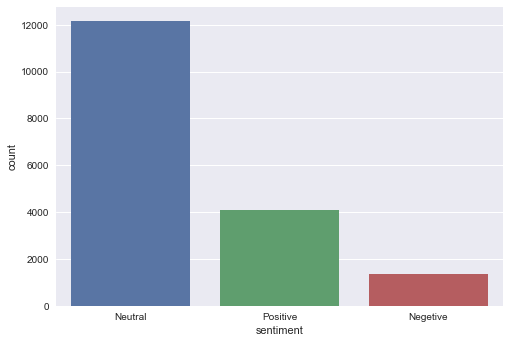

In [15]:
sns.countplot(comments['sentiment'],label="Count")
plt.show()

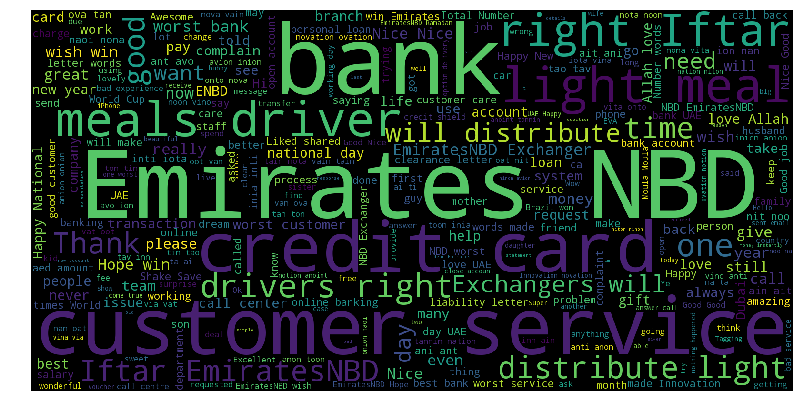

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

high_polarity_words = " ".join(comments["Clean Text"][comments["sentiment"] != "Neutral"].values.tolist())

wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords = stopwords,  
                          max_words=300,
                          max_font_size=200, 
                          random_state=42
                         ).generate(high_polarity_words)
#print(wordcloud)
fig = plt.figure(figsize = (15,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()